# Análisis de la deforestación en la selva amazónica con técnicas de segmentación

## 1. Resumen

El presente trabajo tiene como objetivo cuantificar la deforestación en el Bosque Nacional Jamanxim mediante el análisis de imágenes satelitales (Making Sense Of Amazon Deforestation Patterns, 2019). Se aplicaron y compararon múltiples técnicas de visión artificial para la segmentación: métodos clásicos (Umbralización de Otsu, Color HSV), basados en regiones (Crecimiento de Regiones, Split & Merge), Clustering (K-Means), Superpíxeles (SLIC), Grafos (GrabCut), Morfológicos (Watershed) y basados en Movimiento. Los resultados muestran una tendencia creciente en el área deforestada. La comparación de métodos permitió identificar fortalezas y debilidades de cada enfoque en imágenes de teledetección.

## 2. Introducción y fundamento teórico

La deforestación en la Amazonía es un problema crítico que requiere monitoreo constante y representa uno de los principales retos a nivel mundial (B. M. Flores et al., 2024). El análisis automático de imágenes satelitales permite obtener métricas objetivas sobre la pérdida de cobertura forestal en el tiempo. En este laboratorio, se integran diversas estrategias de segmentación de imágenes para identificar y cuantificar zonas deforestadas en una secuencia temporal, evaluando la eficacia de métodos avanzados frente a técnicas básicas.
La segmentación de imágenes parte desde enfoques clásicos basados en umbrales y color hasta estrategias más avanzadas fundamentadas en regiones, clustering, grafos y morfología matemática. Según González & Woods (2018), la elección del método adecuado depende del tipo de imagen, la naturaleza de los objetos de interés y las condiciones de adquisición.


### 2.1.	Métodos clásicos
•	Por color en HSV
Se basa en la separación de píxeles según sus componentes cromáticos. González & Woods (2018) destacan que el espacio HSV produce mejores resultados que en RGB. Ya que Hue representa el tono dominante, S la saturación o pureza del color y V la intensidad luminosa.
•	Umbralización de Otsu
El método de Otsu propone una estrategia automática para seleccionar el umbral óptimo que maximiza la separabilidad entre ambas clases. Otsu define el umbral como aquel que maximiza la varianza interclase o, de forma equivalente, minimiza la varianza intraclase. A partir del histograma de la imagen, se evalúan todos los posibles valores de umbral y se selecciona el que produce la mejor separación estadística entre píxeles claros y oscuros.
### 2.2.	Métodos basados en regiones
•	Crecimiento de regiones
El crecimiento de regiones es un método bottom-up que comienza a partir de uno o varios píxeles semilla y va agregando píxeles vecinos si cumplen un criterio de similitud (intensidad, color, textura). De esta forma una región se expande mientras la diferencia entre el píxel candidato y la región sea menor que un umbral predefinido.
•	Split and merge
Este método top-down comienza considerando toda la imagen como una única región.
1.	Se divide (split) una región si no cumple un criterio de homogeneidad.
2.	Luego se fusionan (merge) regiones adyacentes que sí cumplen el criterio.
Generalmente se implementa mediante estructuras tipo quadtree (Estructuras de datos espaciales eficientes que permiten descubrir rápidamente si cumplen los criterios).
### 2.3.	Métodos basados en Clustering (agrupamiento)
•	K-means
Este método K-Means es un algoritmo no supervisado que agrupa píxeles en K clusters según su similitud en un espacio de características (intensidad, color, textura).
Cada píxel se asigna al centroide más cercano, y los centroides se actualizan iterativamente hasta converger.
•	Superpíxeles - SLIC (Simpler Linear Iterative Clustering)
SLIC agrupa píxeles en superpíxeles compactos y aproximadamente uniformes combinando información espacial y de color.
El algoritmo adapta K-Means a un espacio 5D (color + coordenadas espaciales) para generar regiones coherentes localmente.
### 2.4.	Métodos basados en grafos
•	GrabCut
GrabCut modela la segmentación como un problema de minimización de energía en grafos. Utiliza modelos de mezcla gaussiana (GMM) para representar fondo y objeto, y resuelve la segmentación mediante cortes mínimos en un grafo que representa píxeles y sus relaciones. 
### 2.5.	Método de cuencas (watershed) morfológicas 
El método watershed interpreta la imagen como una superficie topográfica donde las intensidades representan alturas. Se simula una inundación desde mínimos locales; cuando dos frentes de agua se encuentran, se define una línea divisoria (borde).
### 2.6.	Métodos basados en movimiento
Estos métodos segmentan objetos en secuencias de video usando información temporal. Se basan en: diferencias entre fotogramas, flujo óptico y modelos de fondo (background subtraction). La idea central es que los píxeles en movimiento presentan variaciones temporales significativas respecto al fondo. 
La Tabla 1, presenta una comparación entre los métodos explicados previamente, destacando sus ventajas, limitaciones y ámbitos de aplicación. Esta comparación permite justificar la selección de técnicas en función del tipo de imagen, la complejidad de la escena y los objetivos del análisis, tal como se recomienda en Gonzalez y Woods (2018).

| Método                     | Ventajas                                                                 | Desventajas                                                                 | Casos de uso típicos                                                                 |
|----------------------------|--------------------------------------------------------------------------|-----------------------------------------------------------------------------|-------------------------------------------------------------------------------------|
| Umbralización de Otsu      | Automático, rápido, fácil de implementar, no requiere parámetros manuales | Funciona bien solo con histogramas bimodales, sensible a ruido e iluminación no uniforme | Segmentación binaria simple, documentos escaneados, imágenes médicas básicas         |
| Segmentación por color (HSV) | Intuitiva, robusta frente a variaciones moderadas de iluminación, adecuada para objetos con color dominante | Dependiente de umbrales empíricos, sensible a sombras y cambios fuertes de iluminación | Detección de vegetación, seguimiento de objetos por color, análisis de imágenes satelitales |
| Crecimiento de regiones    | Produce regiones conectadas, coherente con percepción humana, simple conceptualmente | Muy sensible a semillas y ruido, riesgo de sobrecrecimiento                  | Segmentación de regiones homogéneas, imágenes médicas, análisis de zonas forestales   |
| Split & Merge              | No requiere semillas, control estructurado, asegura homogeneidad regional | Dependiente de umbrales, posible generación de artefactos, alto costo computacional | Segmentación jerárquica, imágenes con grandes regiones uniformes                      |
| K-Means                    | No supervisado, flexible, fácil de implementar, admite múltiples clases   | Requiere definir K, sensible a inicialización, regiones no necesariamente conectadas | Segmentación por color o intensidad, clasificación preliminar de imágenes satelitales |
| SLIC                       | Reduce complejidad, preserva bordes, eficiente, ideal como preprocesamiento | No produce segmentación final, requiere ajustar parámetros                   | Preprocesamiento para métodos avanzados, visión por computador, Deep Learning        |
| GrabCut                    | Alta precisión, robusto a texturas complejas, permite refinamiento iterativo | Requiere inicialización, alto costo computacional                            | Segmentación interactiva, edición de imágenes, extracción precisa de objetos          |
| Watershed                  | Excelente para separar objetos en contacto, basado en topología           | Sobresegmentación severa, requiere marcadores y filtrado previo              | Segmentación de células, análisis morfológico, imágenes satelitales con marcadores    |
| Segmentación por movimiento | Aprovecha información temporal, efectiva en escenas dinámicas             | Sensible a cambios de iluminación, problemas con cámaras móviles             | Video vigilancia, análisis de tráfico, detección de objetos en movimiento             |


## 3. Configuración e Importación de Librerías

In [1]:
import os # sistema operativo
import cv2 # OpenCV
import glob # manejo de archivos
import numpy as np # manejo de arrays
from collections import deque # cola
from typing import Tuple, List # tipos
import matplotlib.pyplot as plt # graficos
from scipy.ndimage import gaussian_filter1d # filtro gaussiano
from skimage.segmentation import slic # segmentacion SLIC
from skimage.util import img_as_float # conversion a float

Calculamos el área deforestada usando la escala proporcionada:
- **51 píxeles = 20 km**
- Factor de escala lineal: $20 / 51$ km/px
- Factor de área: $(20 / 51)^2$ km²/px²

In [2]:
# Constantes de escala
PIXELS_REF = 51
KM_REF = 20
AREA_PER_PIXEL = (KM_REF / PIXELS_REF) ** 2
print(f"Área por píxel: {AREA_PER_PIXEL:.4f} km²")

Área por píxel: 0.1538 km²


## 4. Carga y Exploración de Datos

Definimos la ruta de las imágenes extraídas y cargamos la secuencia temporal.

Se encontraron 20 imágenes.


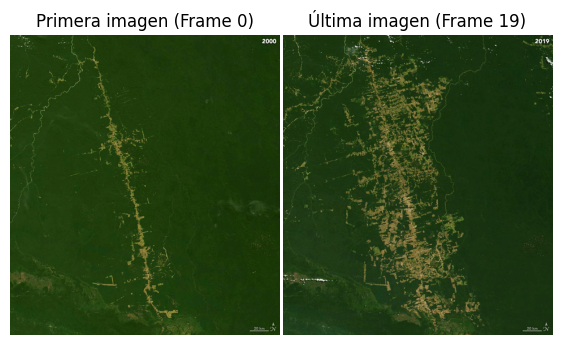

In [3]:
input_dir = r"extracted_frames"
image_files = sorted(glob.glob(os.path.join(input_dir, "*.png")))

print(f"Se encontraron {len(image_files)} imágenes.")

if image_files:
    # Leer primera imagen
    img_first = cv2.imread(image_files[0])
    img_first_rgb = cv2.cvtColor(img_first, cv2.COLOR_BGR2RGB)

    # Leer última imagen
    img_last = cv2.imread(image_files[-1])
    img_last_rgb = cv2.cvtColor(img_last, cv2.COLOR_BGR2RGB)

    # Crear subplots
    plt.figure(figsize=(7, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(img_first_rgb)
    plt.title("Primera imagen (Frame 0)")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(img_last_rgb)
    plt.title(f"Última imagen (Frame {len(image_files)-1})")
    plt.axis("off")

    plt.subplots_adjust(wspace=0.01)
    plt.savefig("out/evolucion_frames.png", dpi=300)

    plt.show()

In [4]:
def select_random_seeds(image, margin_percent, dark_mask, num_seeds=10, seed=None):

    """Selecciona semillas aleatorias en una imagen, evitando bordes y áreas oscuras.

    Args:
        image (numpy.ndarray): Imagen de entrada.
        margin_percent (float): Porcentaje de margen a ignorar en los bordes.
        dark_mask (numpy.ndarray): Máscara binaria indicando áreas oscuras a evitar.
        num_seeds (int, optional): Número de semillas a generar. Default es 10.
        seed (int, optional): Semilla para la generación aleatoria. Default es None.

    Returns:
        list: Lista de tuplas (x, y) con las coordenadas de las semillas.
    """

    h, w = image.shape[:2]

    # Márgenes
    margin_y = int(margin_percent * h)
    margin_x = int(margin_percent * w)

    y_min, y_max = margin_y, h - margin_y
    x_min, x_max = margin_x, w - margin_x

    # Región central (a excluir)
    central_mask = np.zeros(dark_mask.shape, dtype=bool)
    central_mask[y_min:y_max, x_min:x_max] = True

    # Oscuros fuera del margen central
    valid_mask = dark_mask & ~central_mask

    # División izquierda / derecha
    mid_x = w // 2

    left_mask  = valid_mask & (np.arange(w)[None, :] < mid_x)
    right_mask = valid_mask & (np.arange(w)[None, :] >= mid_x)

    ys_l, xs_l = np.where(left_mask)
    ys_r, xs_r = np.where(right_mask)

    if len(xs_l) == 0 and len(xs_r) == 0:
        return []

    np.random.seed(seed)

    n_left  = num_seeds // 2
    n_right = num_seeds - n_left

    seeds = []

    if len(xs_l) > 0:
        idx_l = np.random.choice(len(xs_l),
                                 size=min(n_left, len(xs_l)),
                                 replace=False)
        seeds.extend(zip(ys_l[idx_l], xs_l[idx_l]))

    if len(xs_r) > 0:
        idx_r = np.random.choice(len(xs_r),
                                 size=min(n_right, len(xs_r)),
                                 replace=False)
        seeds.extend(zip(ys_r[idx_r], xs_r[idx_r]))

    return seeds


In [5]:
def plot_intensity_analysis(image, title_prefix, margin_percent=0.2, percentile_bright=98, percentile_dark=30, num_seeds= 10, seed=42):
    """Grafica: Original | Grises | Histograma Intensidad | Máscara Brillo (>percentile_bright99)."""

    h, w = image.shape[:2]

    margin_y = int(margin_percent * h)
    margin_x = int(margin_percent * w)

    y_min, y_max = margin_y, h - margin_y
    x_min, x_max = margin_x, w - margin_x

    img_vis = image.copy()
    img_vis = cv2.cvtColor(img_vis, cv2.COLOR_BGR2RGB)

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    threshold = np.percentile(gray, percentile_bright)
    bright_mask = gray >= threshold

    threshold2 = np.percentile(gray, percentile_dark)
    dark_mask = gray <= threshold2
    # kernel = np.ones((3,3), np.uint8)
    # bright_mask_clean = cv2.morphologyEx(bright_mask.astype(np.uint8),
    #                                      cv2.MORPH_OPEN,
    #                                      kernel)
    print(
    f"Alto {h} por ancho {w} de la imagen = {h * w} pixeles\n",    
    f"p{percentile_bright} = {threshold:.1f}\n",
    f"Area de pixeles brillosos: {np.count_nonzero(bright_mask) * AREA_PER_PIXEL :.3f} Km2"
    )

    plt.figure(figsize=(20, 5))
    
    # 1. Imagen Original (Convertir BGR a RGB para matplotlib)
    plt.subplot(1, 5, 1)
    plt.imshow(img_vis)
    plt.title(f"{title_prefix} - Original")
    plt.axis('off')
    
    # 2. Escala de Grises
    plt.subplot(1, 5, 2)
    plt.imshow(gray, cmap='gray')
    plt.title("Escala de Grises")
    plt.axis('off')

    # 3. Histograma de Intensidades
    plt.subplot(1, 5, 3)
    plt.hist(gray.ravel(), bins=256, color='gray')
    plt.axvline(threshold, color='r', linestyle='--', label=f'p{percentile_bright}: {threshold:.1f}')
    plt.title("Histograma de Intensidad")
    plt.xlabel("Intensidad")
    plt.ylabel("Frecuencia")
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 4. Máscara de Alta Intensidad
    plt.subplot(1, 5, 4)
    plt.imshow(bright_mask, cmap='gray')
    plt.title("Máscara de Alta Intensidad")
    plt.axis('off')

    # 5. Seleccion aleatoria de semillas
    seeds = select_random_seeds(gray, margin_percent, dark_mask, num_seeds, seed)
    # Dibujar ROI Region central
    cv2.rectangle(img_vis,
                (x_min, y_min),
                (x_max, y_max),
                (255, 255, 0), 2)

    # Dibujar semillas
    for y, x in seeds:
        cv2.circle(img_vis, (x, y), 3, (255, 0, 0), -1)
    
    plt.subplot(1, 5, 5)
    plt.imshow(img_vis, cmap='gray')
    plt.title(f"Selección Aleatoria de {num_seeds} semillas")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

Alto 800 por ancho 720 de la imagen = 576000 pixeles
 p98.1 = 90.0
 Area de pixeles brillosos: 1710.573 Km2


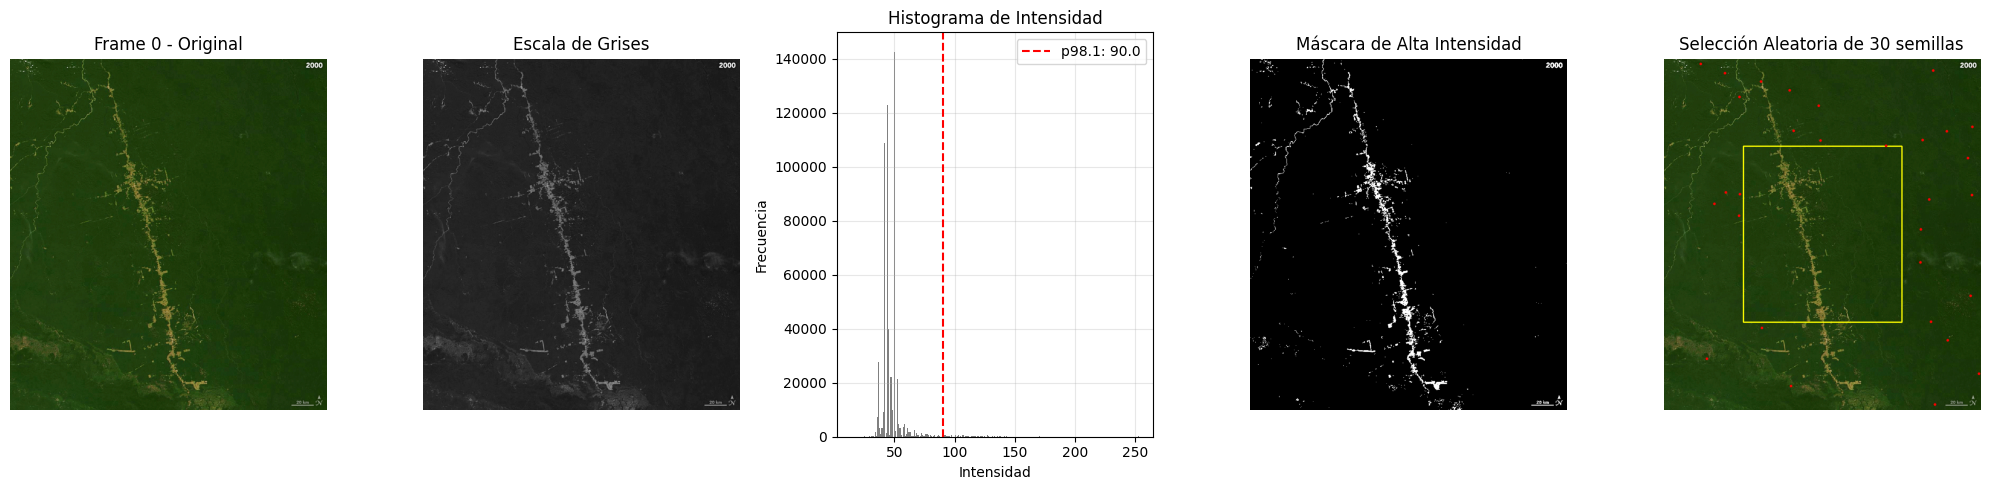

Alto 800 por ancho 720 de la imagen = 576000 pixeles
 p91 = 81.0
 Area de pixeles brillosos: 8026.759 Km2


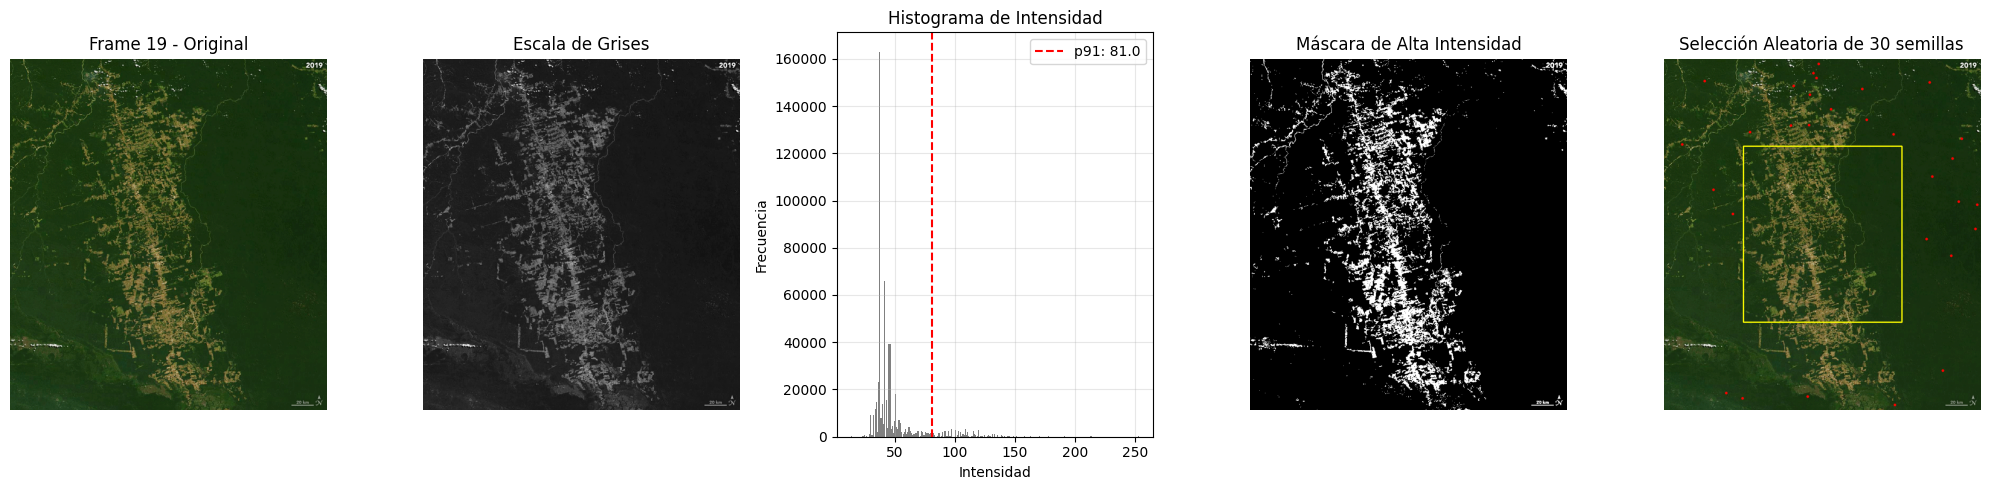

In [6]:
# Índices de los frames a analizar
frame_indices = [0, 19]

for idx in frame_indices:
    if idx < len(image_files):
        img_path = image_files[idx]
        img = cv2.imread(img_path)
        
        if img is not None:
            if idx == 0:
                plot_intensity_analysis(image=img, title_prefix=f"Frame {idx}", margin_percent=0.25,
                                        percentile_bright=98.1, num_seeds=30, seed=30)
            else:
                plot_intensity_analysis(image=img, title_prefix=f"Frame {idx}", margin_percent=0.25,
                                        percentile_bright=91, num_seeds=30, seed=30)
        else:
            print(f"Error al cargar frame {idx}")

## 5. Implementación de Algoritmos de Segmentación

El índice Excess Green (ExG) es un índice espectral muy usado para resaltar vegetación en imágenes RGB, especialmente cuando no se dispone de bandas multiespectrales (como en imágenes satelitales simples o drones RGB).

### Preprocesamiento, humbralización y post-procesamiento

In [7]:
def preprocess_image(image):
    """
    Aplica conversión a escala de grises y mejora de contraste (CLAHE).
    """
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    enhanced = clahe.apply(gray)
    # Suavizado para reducir ruido
    blurred = cv2.GaussianBlur(enhanced, (5, 5), 0)
    return blurred

def segment_otsu(image):
    """
    Segmentación basada en umbralización de Otsu.
    """
    processed = preprocess_image(image)
    # Otsu invierte si el objeto es oscuro sobre fondo claro, ajustamos según necesidad
    # Asumimos que la deforestación (tierra) es más clara o distinta del bosque oscuro
    ret, mask = cv2.threshold(processed, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return mask

def vegetation_mask_exg(img):

    """Genera una máscara de vegetación basada en el índice Excess Green (ExG).

    Args:
        img (numpy.ndarray): Imagen BGR de entrada.

    Returns:
        numpy.ndarray: Máscara binaria donde la vegetación es blanca (255).
    """

    b, g, r = cv2.split(img.astype(np.float32))
    exg = 2*g - r - b
    exg_norm = cv2.normalize(exg, None, 0, 255, cv2.NORM_MINMAX)
    
    return exg_norm > 120  # vegetación

def segment_color_hsv(image):
    """
    Segmentación basada en color HSV para aislar zonas no verdes (tierra/deforestado).
    """
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    lower_soil = np.array([5, 30, 40])
    upper_soil = np.array([35, 200, 220])

    mask_soil = cv2.inRange(hsv, lower_soil, upper_soil)

    veg = vegetation_mask_exg(img)

    # suelo urbano = suelo HSV pero NO vegetación
    mask_urban = mask_soil & (~veg.astype(np.uint8)*255)

    return mask_urban

def post_process_morphology(mask):
    """
    Aplica operaciones morfológicas para limpiar la máscara.
    """
    kernel = np.ones((5,5), np.uint8)
    # Opening para quitar ruido blanco (pequeños puntos)
    opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    # Closing para cerrar agujeros dentro de las zonas detectadas
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
    return closing

### Segmentación por regiones

In [8]:
def segment_region_growing_forest(
    img,
    percentile=25,
    num_seeds=50,
    tolerance=18,
    margin_percent=0.25,
    seed=30
    ):
    """Segmenta el bosque utilizando el algoritmo de crecimiento de regiones.

    Args:
        img (numpy.ndarray): Imagen de entrada.
        percentile (float, optional): Percentil para definir el umbral inicial. Default 25.
        num_seeds (int, optional): Número de semillas aleatorias. Default 50.
        tolerance (int, optional): Tolerancia para el crecimiento. Default 18.
        margin_percent (float, optional): Margen para evitar bordes. Default 0.25.
        seed (int, optional): Semilla aleatoria. Default 30.

    Returns:
        numpy.ndarray: Máscara binaria del bosque segmentado.
    """

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    rows, cols = gray.shape

    # 1️⃣ Máscara de oscuros
    threshold = np.percentile(gray, percentile)
    dark_mask = gray <= threshold

    # 2️⃣ Semillas estratificadas
    seeds = select_random_seeds(
        gray,
        margin_percent,
        dark_mask,
        num_seeds,
        seed
    )

    if len(seeds) == 0:
        return np.zeros_like(gray, dtype=np.uint8)

    segmentation = np.zeros_like(gray, dtype=np.uint8)
    processed = np.zeros_like(gray, dtype=bool)

    # 3️⃣ Region growing por seed (NO global)
    for sy, sx in seeds:

        if processed[sy, sx]:
            continue

        queue = deque([(sy, sx)])
        region_mean = float(gray[sy, sx])

        processed[sy, sx] = True
        segmentation[sy, sx] = 255

        while queue:
            y, x = queue.popleft()

            for dy, dx in [(-1,0),(1,0),(0,-1),(0,1)]:
                ny, nx = y + dy, x + dx

                if 0 <= ny < rows and 0 <= nx < cols and not processed[ny, nx]:
                    diff = abs(float(gray[ny, nx]) - region_mean)

                    if diff < tolerance:
                        processed[ny, nx] = True
                        segmentation[ny, nx] = 255
                        queue.append((ny, nx))

                        # actualización lenta del promedio
                        region_mean = 0.99 * region_mean + 0.01 * gray[ny, nx]

    # overlay = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

    # for y, x in seeds:
    #     cv2.circle(overlay, (x, y), 3, (0,0,255), -1)

    # overlay[segmentation == 255] = [0,255,0]

    # plt.imshow(overlay)
    # plt.title("Seeds (rojo) + Región Crecida (verde)")
    # plt.axis("off")
    # plt.show()

    return segmentation

In [9]:
def split_quadtree(gray, x, y, size, min_size, threshold, blocks):
    region = gray[y:y+size, x:x+size]

    if size <= min_size:
        blocks.append((x, y, size))
        return

    if np.std(region) <= threshold:
        blocks.append((x, y, size))
        return

    half = size // 2
    split_quadtree(gray, x, y, half, min_size, threshold, blocks)
    split_quadtree(gray, x+half, y, half, min_size, threshold, blocks)
    split_quadtree(gray, x, y+half, half, min_size, threshold, blocks)
    split_quadtree(gray, x+half, y+half, half, min_size, threshold, blocks)

def segment_split_and_merge_quadtree(img, min_size=4, threshold_factor=0.4):
    # 1. Escala de grises double
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(np.float32) / 255.0

    h, w = gray.shape

    # 2. Ajustar tamaño a múltiplos de min_size
    h2 = int(np.ceil(h / min_size) * min_size)
    w2 = int(np.ceil(w / min_size) * min_size)

    gray_resized = cv2.resize(gray, (w2, h2), interpolation=cv2.INTER_LINEAR)

    # 3. Umbral automático (igual al MATLAB)
    std_global = np.std(gray_resized)
    range_global = gray_resized.max() - gray_resized.min()
    threshold = (0.7 * std_global + 0.3 * range_global) * threshold_factor

    # 4. Split quadtree
    blocks = []
    split_quadtree(gray_resized, 0, 0, min(h2, w2), min_size, threshold, blocks)

    # 5. Imagen segmentada por intensidad media
    segmented = np.zeros_like(gray_resized)

    for x, y, size in blocks:
        block = gray_resized[y:y+size, x:x+size]
        segmented[y:y+size, x:x+size] = block.mean()

    # 6. Recortar al tamaño original
    segmented = segmented[:h, :w]

    return segmented

def segment_split_and_merge_mask(
    img,
    min_size=4,
    threshold_factor=0.4,
    percentile=50   # <-- CLAVE
):
    segmented = segment_split_and_merge_quadtree(
        img,
        min_size=min_size,
        threshold_factor=threshold_factor
    )

    segmented_8u = (segmented * 255).astype(np.uint8)

    # Umbral adaptativo por percentil (NO Otsu)
    th = np.percentile(segmented_8u, percentile)

    # Asumimos: valores bajos = zonas más oscuras (vegetación)
    mask_deforestation = segmented_8u > th

    return (mask_deforestation.astype(np.uint8) * 255)

### Segmentación K-means, SLIC y GrabCut

In [10]:
def segment_kmeans(img, k=4):

    """Segmenta la imagen utilizando el algoritmo K-Means clustering.

    Args:
        img (numpy.ndarray): Imagen de entrada.
        k (int, optional): Número de clusters. Default es 4.

    Returns:
        numpy.ndarray: Máscara binaria de la vegetación/bosque.
    """
    pixel_values = img.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    
    # Heurística: Identificar clusters que NO son verdes (deforestación)
    # Convertir centros a HSV para comprobar verde
    centers_hsv = cv2.cvtColor(np.uint8([centers]), cv2.COLOR_BGR2HSV)[0]
    
    # Rango verde (mismo que segment_color_hsv)
    lower_green = np.array([35, 40, 40])
    upper_green = np.array([85, 255, 255])
    
    deforested_labels = []
    for i, center_hsv in enumerate(centers_hsv):
        # Si NO está en el rango verde, es deforestado
        if not (np.all(center_hsv >= lower_green) and np.all(center_hsv <= upper_green)):
            deforested_labels.append(i)
            
    # Crear máscara
    mask = np.isin(labels.flatten(), deforested_labels).reshape(img.shape[:2])
    return (mask.astype(np.uint8) * 255)

def segment_slic(img, n_segments=200):

    """Segmenta la imagen utilizando Superpixels (SLIC).

    Args:
        img (numpy.ndarray): Imagen de entrada.
        n_segments (int, optional): Número aproximado de superpixels. Default 200.

    Returns:
        numpy.ndarray: Máscara binaria resultante.
    """
    try:
               
        # SLIC
        segments = slic(img_as_float(img), n_segments=n_segments, compactness=10, sigma=1, start_label=0)
        
        # Clasificar segmentos como deforestación si su color medio no es verde
        mask = np.zeros(img.shape[:2], dtype=np.uint8)
        
        # Convertir imagen a HSV para análisis de color
        hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        lower_green = np.array([35, 40, 40])
        upper_green = np.array([85, 255, 255])
        
        for seg_idx in np.unique(segments):
            # Máscara del segmento actual
            seg_mask = (segments == seg_idx)
            
            # Color medio en HSV
            mean_color = cv2.mean(hsv_img, mask=seg_mask.astype(np.uint8))[:3]
            
            # Chequear si es verde
            is_green = (lower_green[0] <= mean_color[0] <= upper_green[0]) and (lower_green[1] <= mean_color[1] <= upper_green[1]) and (lower_green[2] <= mean_color[2] <= upper_green[2])
            
            if not is_green:
                mask[seg_mask] = 255
                
        return mask
    except ImportError:
        return np.zeros(img.shape[:2], dtype=np.uint8)

In [11]:
# GrabCut
def segment_grabcut_forest(img, iterations=5, percentile_dark=30, percentile_bright=95):
    '''
    1. Inicialización por máscara adaptativa
    2. Usar intensidad para preclasificar (Oscuro=Bosque, Claro=Deforestación)
    3. Segmentar bosque como foreground
    4. Invertir para obtener deforestación
    5. Suavizar con morfología
    '''
    h, w = img.shape[:2]
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 1️⃣ Inicialización: Todo es Probable Foreground (Bosque)
    # Asumimos que la mayor parte es bosque
    grabcut_mask = np.full((h, w), cv2.GC_PR_FGD, np.uint8)

    # 2️⃣ Preclasificación por Intensidad
    # Suelo/Deforestación suele ser más claro que el bosque denso
    
    # Zona clara -> Fondo Seguro (Deforestación)
    p_bright = np.percentile(gray, percentile_bright) 
    grabcut_mask[gray > p_bright] = cv2.GC_BGD
    
    # Zona oscura -> Bosque Seguro
    p_dark = np.percentile(gray, percentile_dark)
    grabcut_mask[gray < p_dark] = cv2.GC_FGD

    # Nota: Eliminamos la inicialización de bordes fijos ya que puede inducir errores
    # si el bosque toca los bordes.

    bgdModel = np.zeros((1, 65), np.float64)
    fgdModel = np.zeros((1, 65), np.float64)

    try:
        cv2.grabCut(
            img,
            grabcut_mask,
            None,
            bgdModel,
            fgdModel,
            iterations,
            cv2.GC_INIT_WITH_MASK
        )
    except cv2.error:
        # Fallback si GrabCut falla
        return np.zeros((h,w), dtype=np.uint8)

    # 3️⃣ Extraer Bosque (FGD + PR_FGD)
    forest = np.where(
        (grabcut_mask == cv2.GC_FGD) | (grabcut_mask == cv2.GC_PR_FGD),
        255, 0
    ).astype(np.uint8)
    
    # 4️⃣ Suavizado con Morfología
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    forest = cv2.morphologyEx(forest, cv2.MORPH_OPEN, kernel)
    forest = cv2.morphologyEx(forest, cv2.MORPH_CLOSE, kernel)

    # 5️⃣ Invertir para retornar Deforestación
    return cv2.bitwise_not(forest)

### Segmentación watershed y por movimiento

In [12]:
def segment_watershed(
        img,
        percentile_dark=30,
        margin_percent=0.25,
        num_seeds=80,
        tolerance=30
    ):
    """Segmenta la imagen utilizando el algoritmo Watershed con marcadores automáticos.

    Args:
        img (numpy.ndarray): Imagen de entrada.
        percentile_dark (int, optional): Percentil para identificar fondo oscuro. Default 30.
        margin_percent (float, optional): Margen de seguridad en bordes. Default 0.25.
        num_seeds (int, optional): Número de semillas para marcadores. Default 80.
        tolerance (int, optional): Tolerancia para región de crecimiento. Default 30.

    Returns:
        numpy.ndarray: Máscara binaria de la segmentación.
    """

    
    # Segmentación por Watershed mejorada usando Otsu para binarización robusta.
    # Retorna máscara de deforestación (255 = deforestado).
    
    # --- 1. Preprocesamiento ---
    if len(img.shape) == 3:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        gray = img
        
    h, w = gray.shape
    gray_blur = cv2.GaussianBlur(gray, (5, 5), 0)

    # --- 2. Máscaras globales (Otsu) ---
    # Usamos Otsu para encontrar el umbral óptimo automáticamentte
    ret, thresh_otsu = cv2.threshold(gray_blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Definimos zonas seguras
    # Usamos un margen fijo o dinámico para asegurar pureza de las semillas
    margin_val = 5
    
    # Bosque: Zonas definitivamente oscuras
    dark_mask = gray_blur < (ret - margin_val)
    
    # Fondo/Deforestado: Zonas definitivamente claras
    bright_mask = gray_blur > (ret + margin_val)

    # --- 3. Selección de semillas oscuras ---
    seeds = select_random_seeds(
        gray_blur,
        margin_percent,
        dark_mask, # Usamos la máscara de Otsu
        num_seeds=num_seeds,
        seed=42
    )

    if len(seeds) == 0:
        return np.zeros_like(gray, dtype=np.uint8)

    # --- 4. Máscara de semillas ---
    seed_mask = np.zeros((h, w), dtype=np.uint8)
    for y, x in seeds:
        seed_mask[y, x] = 255

    seed_mask = cv2.dilate(seed_mask, np.ones((3,3), np.uint8), iterations=1)

    # --- 5. Marcadores Watershed ---
    markers = np.zeros((h, w), dtype=np.int32)
    # Marcador 1: Bosque (Semillas)
    markers[seed_mask > 0] = 1
    # Marcador 2: Fondo (Bright Area)
    markers[bright_mask] = 2   
    
    # --- 6. Gradiente ---
    gradient = cv2.Laplacian(gray_blur, cv2.CV_32F)
    gradient = np.abs(gradient)
    gradient = cv2.normalize(gradient, None, 0, 255, cv2.NORM_MINMAX)
    gradient = gradient.astype(np.uint8)
    gradient_color = cv2.cvtColor(gradient, cv2.COLOR_GRAY2BGR)

    # --- 7. Watershed ---
    cv2.watershed(gradient_color, markers)

    # --- 8. EXTRAER BOSQUE ---
    forest = np.zeros((h, w), dtype=np.uint8)
    forest[markers == 1] = 255
    
    # Limpieza: Asegurar que el bosque no incluya zonas muy brillantes (falsos positivos)
    forest[gray_blur > (ret + margin_val*4)] = 0

    # --- Limpieza morfológica ---
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    forest = cv2.morphologyEx(forest, cv2.MORPH_OPEN, kernel)
    forest = cv2.morphologyEx(forest, cv2.MORPH_CLOSE, kernel)

    # --- 9. Deforestación (Inverso del bosque) ---
    deforestation = cv2.bitwise_not(forest)

    # #--- Debug visual ---
    # overlay = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
    # for y, x in seeds:
    #     cv2.circle(overlay, (x, y), 3, (0,0,255), -1)
    # overlay[deforestation == 255] = [0,255,0]
    # plt.figure(figsize=(5,5))
    # plt.imshow(overlay)
    # plt.axis("off")
    # plt.show()

    return deforestation


In [13]:
# Inicializar Motion Subtractor
# history=200: aprende rápido cambios de iluminación entre años
# varThreshold=50: umbral alto para reducir ruido
# detectShadows=False: no contar sombras como deforestación
backSub = cv2.createBackgroundSubtractorMOG2(history=200, varThreshold=50, detectShadows=False)
# Kernel para limpieza de ruido
kernel_clean = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))

## 6. Segmentacion y calculo de area deforestada

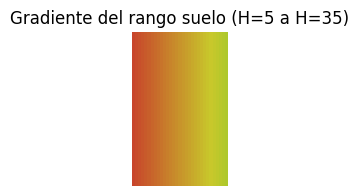

In [14]:
lower_soil = np.array([5, 30, 40])
upper_soil = np.array([35, 200, 220])

h_values = np.arange(lower_soil[0], upper_soil[0] + 1)
s = 200  # saturación fija
v = 200  # brillo fijo

hsv_strip = np.zeros((50, len(h_values), 3), dtype=np.uint8)

for i, h in enumerate(h_values):
    hsv_strip[:, i] = [h, s, v]

rgb_strip = cv2.cvtColor(hsv_strip, cv2.COLOR_HSV2RGB)

plt.figure(figsize=(10, 2))
plt.imshow(rgb_strip)
plt.title("Gradiente del rango suelo (H=5 a H=35)")
plt.axis("off")
plt.show()

In [15]:
# Crear carpeta out si no existe
os.makedirs('out', exist_ok=True)

results = {
    'Otsu':[],
    'Color (HSV)':[],
    'Region Growing':[],
    'K-Means':[],
    'SLIC':[],
    'GrabCut':[],
    'Watershed':[],
    'Motion (MOG2)':[]
}

years = list(range(2000, 2000 + len(image_files))) 

In [16]:
print("Procesando imágenes...")

# Crear carpeta out si no existe
os.makedirs('out', exist_ok=True)

for idx, img_path in enumerate(image_files):
    img = cv2.imread(img_path)
    if img is None: continue
    
    current_masks = {}
    
    # --- Métodos ---
    # Otsu
    try:
        mask_otsu = segment_otsu(img)
        mask_otsu_clean = post_process_morphology(mask_otsu)
        results['Otsu'].append(cv2.countNonZero(mask_otsu_clean) * AREA_PER_PIXEL)
        current_masks['Otsu'] = mask_otsu_clean
    except: results['Otsu'].append(0)
    
    # Color
    try:
        mask_color = segment_color_hsv(img)
        results['Color (HSV)'].append(cv2.countNonZero(mask_color) * AREA_PER_PIXEL)
        current_masks['Color (HSV)'] = mask_color
    except: results['Color (HSV)'].append(0)
    
    # Region Growing
    try:
        forest_mask = segment_region_growing_forest(
            img,
            percentile = np.clip(30 + idx * 0.4, 30, 40),
            num_seeds=30,
            tolerance=32,
            seed=30
        )
        deforestation_mask = cv2.bitwise_not(forest_mask)
        area = cv2.countNonZero(deforestation_mask) * AREA_PER_PIXEL
        results['Region Growing'].append(area)
        current_masks['Region Growing'] = deforestation_mask
    except: results['Region Growing'].append(0)

    # # Split & Merge
    # try:
    #     mask_sm = segment_split_merge_approx(img)
    #     results['Split & Merge'].append(cv2.countNonZero(mask_sm) * AREA_PER_PIXEL)
    #     current_masks['Split & Merge'] = mask_sm
    # except Exception as e:
    #     print(f"Split & Merge error: {e}")
    #     results['Split & Merge'].append(0)

    # K-Means
    try:
        mask_kmeans = segment_kmeans(img)
        results['K-Means'].append(cv2.countNonZero(mask_kmeans) * AREA_PER_PIXEL)
        current_masks['K-Means'] = mask_kmeans
    except: results['K-Means'].append(0)
        
    # SLIC
    try:
        mask_slic = segment_slic(img)
        results['SLIC'].append(cv2.countNonZero(mask_slic) * AREA_PER_PIXEL)
        current_masks['SLIC'] = mask_slic
    except: results['SLIC'].append(0)
        
    # GrabCut
    try:
        mask_grab = segment_grabcut_forest(
            img,
            iterations=5,
            # percentile_dark = np.clip(30 + idx * 0.4, 30, 40),
            # percentile_bright = np.clip(98 - idx * 0.4, 98, 90),
        )
        results['GrabCut'].append(cv2.countNonZero(mask_grab) * AREA_PER_PIXEL)
        current_masks['GrabCut'] = mask_grab
    except: results['GrabCut'].append(0)
        
    # Watershed
    try:
        mask_ws = segment_watershed(
            img,
            percentile_dark = np.clip(30 + idx * 0.4, 30, 40),
            margin_percent=0.25,
            num_seeds=500,
            tolerance=30
        )
        results['Watershed'].append(cv2.countNonZero(mask_ws) * AREA_PER_PIXEL)
        current_masks['Watershed'] = mask_ws
    except: results['Watershed'].append(0)
        
    # Motion
    # Aplicar sustracción de fondo
    try:
        fg_mask = backSub.apply(img)

        # Frame 0 siempre da alto por inicialización, lo forzamos a 0
        if idx == 0:
            results['Motion (MOG2)'].append(0)
            # Limpieza morfológica para eliminar ruido (puntos sueltos)
            fg_mask = cv2.morphologyEx(fg_mask, cv2.MORPH_OPEN, kernel_clean)
            current_masks['Motion (MOG2)'] = fg_mask
        else:
            # Limpieza morfológica para eliminar ruido (puntos sueltos)
            fg_mask = cv2.morphologyEx(fg_mask, cv2.MORPH_OPEN, kernel_clean)

            # Calcular área
            area = cv2.countNonZero(fg_mask) * AREA_PER_PIXEL
            results['Motion (MOG2)'].append(area)
            current_masks['Motion (MOG2)'] = fg_mask
    except: results['Motion (MOG2)'].append(0)

    # --- Guardado de mascaras (Frame 0 y Ultimo Frame) ---
    if idx == 0 or idx == len(image_files) - 1:
        for method, mask in current_masks.items():
            filename = f"out/mask_{method.replace(' ', '_').replace('(', '').replace(')', '')}_{idx}.png"
            cv2.imwrite(filename, mask)
        print(f"Máscaras guardadas")

    print(f"Procesado año {years[idx]}")

print("Procesamiento completado.")


Procesando imágenes...
Máscaras guardadas
Procesado año 2000
Procesado año 2001
Procesado año 2002
Procesado año 2003
Procesado año 2004
Procesado año 2005
Procesado año 2006
Procesado año 2007
Procesado año 2008
Procesado año 2009
Procesado año 2010
Procesado año 2011
Procesado año 2012
Procesado año 2013
Procesado año 2014
Procesado año 2015
Procesado año 2016
Procesado año 2017
Procesado año 2018
Máscaras guardadas
Procesado año 2019
Procesamiento completado.


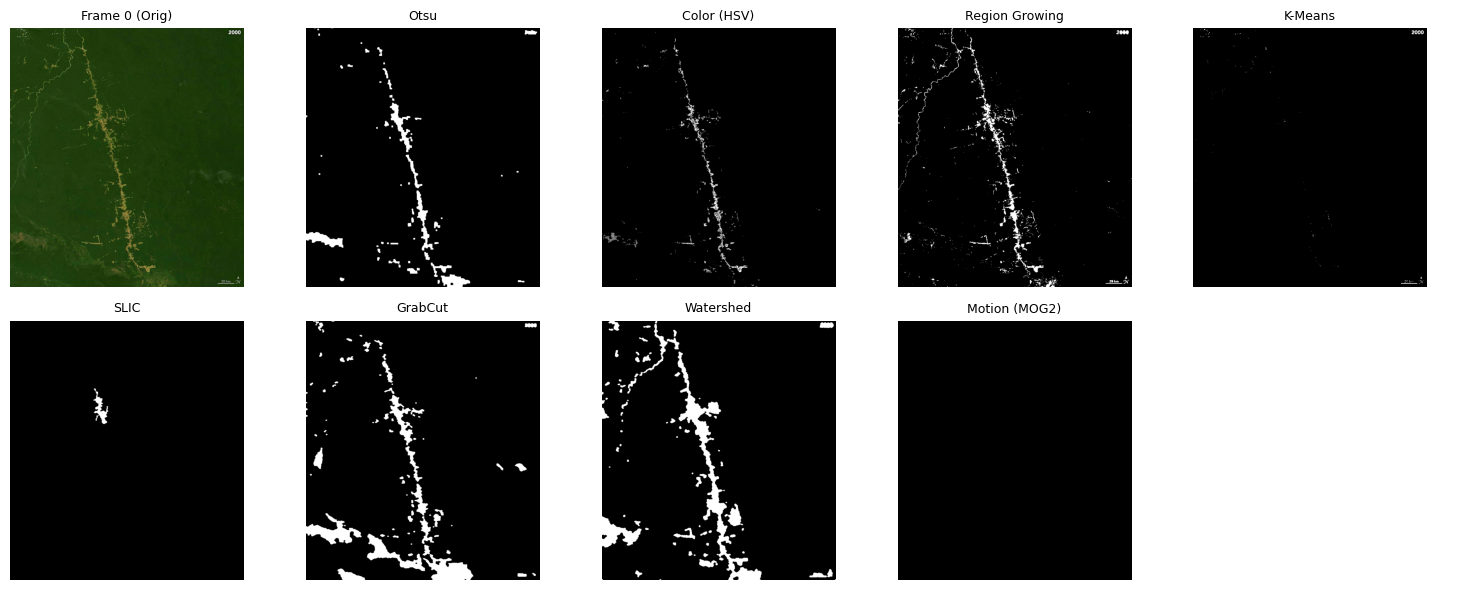

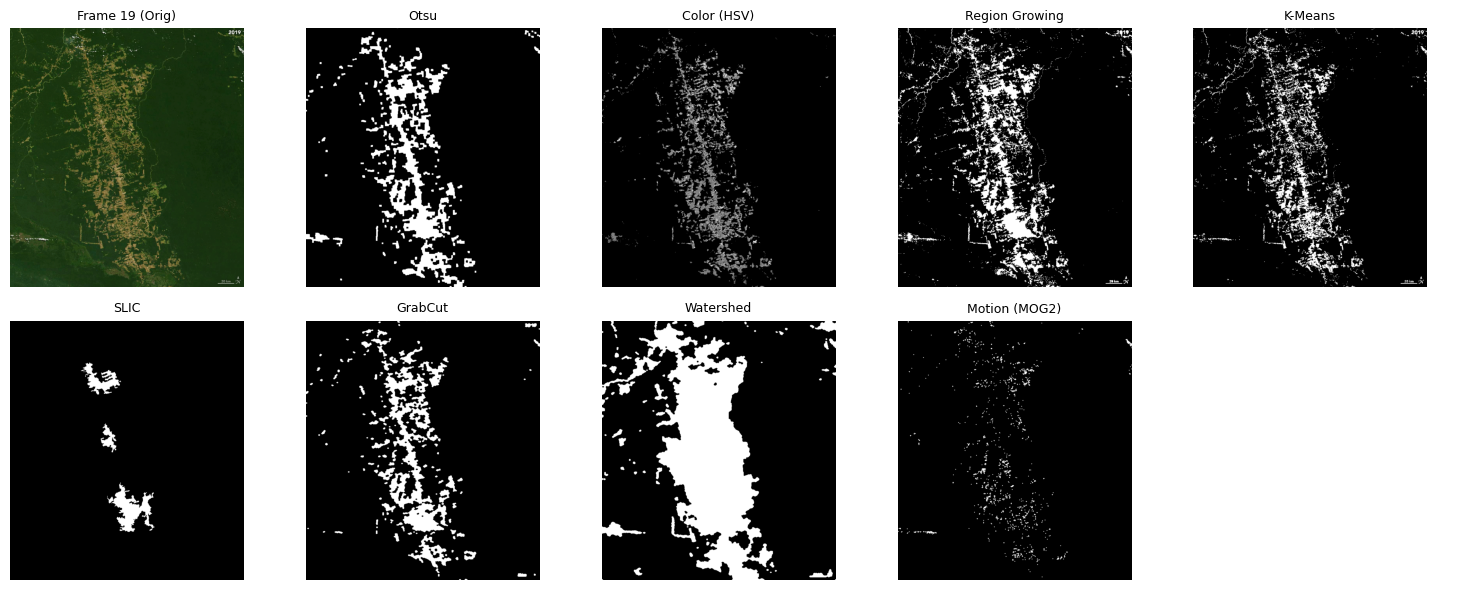

In [17]:
# --- Visualización de Resultados Refactorizada ---
methods = list(results.keys())

def show_img(ax, img_path, title, mask_path=None):

    """Muestra una imagen y opcionalmente una máscara superpuesta usando Matplotlib.

    Args:
        ax (matplotlib.axes.Axes): Eje donde mostrar la imagen.
        img_path (str or numpy.ndarray): Ruta de la imagen o array de imagen.
        title (str): Título de la imagen.
        mask_path (str or numpy.ndarray, optional): Ruta de la máscara o array. Default None.
    """
    if mask_path and os.path.exists(mask_path):
        img = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        if img is None: img = np.zeros((100,100), dtype=np.uint8)
    elif img_path:
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    else:
        img = np.zeros((100,100,3), dtype=np.uint8)
    
    ax.imshow(img, cmap='gray' if mask_path else None)
    ax.set_title(title, fontsize=9)
    ax.axis('off')

for frame_idx in [0, len(image_files) - 1]:
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    axes_flat = axes.flatten()
    
    # Frame original en la primera posición
    show_img(axes_flat[0], image_files[frame_idx], f"Frame {frame_idx} (Orig)")
    
    # Segmentaciones (Máximo 8 métodos para llenar las 9 posiciones restantes)
    for i, method in enumerate(methods[:8]):
        mask_fn = f"out/mask_{method.replace(' ', '_').replace('(', '').replace(')', '')}_{frame_idx}.png"
        show_img(axes_flat[i+1], None, method, mask_path=mask_fn)
    
    # Ocultar el subplot #10 (índice 9)
    axes_flat[-1].axis('off')
    
    plt.tight_layout()
    plt.savefig(f'out/segmented_frames_{frame_idx}.png')
    plt.show()

## 7. Visualización de Resultados

In [18]:
for method_name, areas in results.items():
    
    results[method_name] = gaussian_filter1d(results[method_name], sigma=1).tolist()

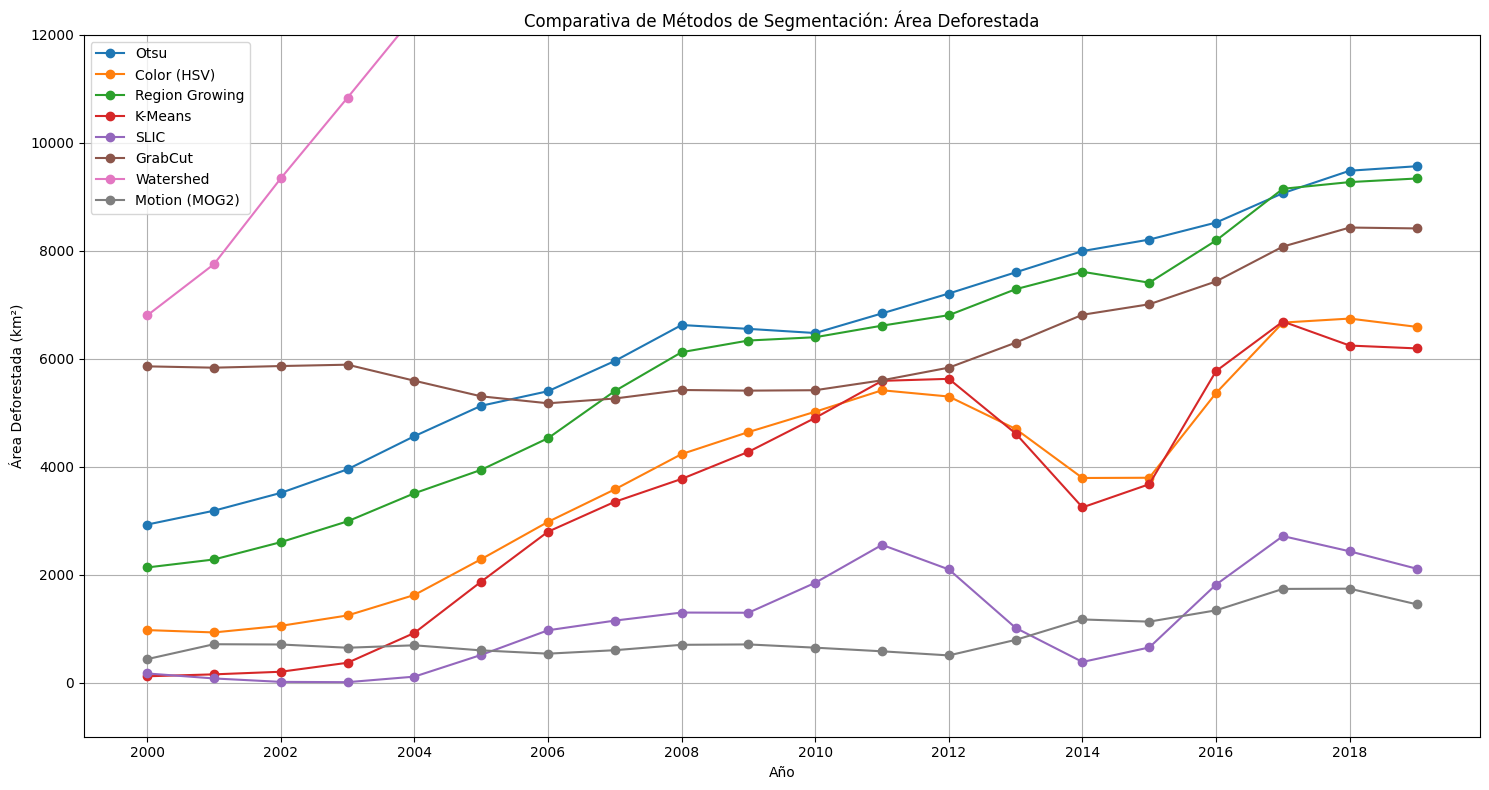

In [19]:
plt.figure(figsize=(15, 8))

# Graficar todos los resultados
for method_name, areas in results.items():

    if len(areas) == len(years):
        plt.plot(years, areas, marker='o', label=method_name)

plt.title('Comparativa de Métodos de Segmentación: Área Deforestada')
plt.xlabel('Año')
plt.ylabel('Área Deforestada (km²)')
plt.grid(True)
plt.xticks(np.arange(min(years), max(years) + 1, 2))
plt.legend()
plt.ylim(-1000,12000)
plt.tight_layout()
plt.savefig('out/area_deforestada_comparativo.png')
plt.show()

## 8. Bibliografía

Making Sense of Amazon Deforestation Patterns. (2019). NASA Earth Observatory. https://science.nasa.gov/earth/earth-observatory/making-sense-of-amazon-deforestation-patterns-145888/

Flores, B. M., Montoya, E., Sakschewski, B., Nascimento, N., Staal, A., Betts, R. A., Levis, C., Lapola, D. M., Esquível-Muelbert, A., Jakovac, C., Nobre, C. A., Oliveira, R. S., Borma, L. S., Nian, D., Boers, N., Hecht, S. B., Ter Steege, H., Arieira, J., Lucas, I. L., . . . Hirota, M. (2024). Critical transitions in the Amazon forest system. Nature, 626(7999), 555-564. https://doi.org/10.1038/s41586-023-06970-0

Gonzalez, R. C., & Woods, R. E. (2018). Digital Image Processing: Cap 6–Cap 10 (4.a ed.). Pearson.